In [2]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [6]:
from scipy.signal import convolve2d as conv2
from skimage import color, data, restoration

sys.path.insert(0,'../xpecgen')
import xpecgen as xg

### Load the arrays 

In [4]:
recon_original = np.load('../xpecgen/data/recons/recon_w_PSF.npy')
projs_original = np.load('../xpecgen/data/projs/recon_w_PSF.npy')

dist = np.linspace(-256*0.0784 - 0.0392,256*0.0784 - 0.0392, 512)
factor = (152/(np.sqrt(dist**2 + 152**2)))**3
flood_summed = factor*660 

inten_original = (np.exp(-projs_original/10)*(flood_summed)).T

In [5]:
kernel = np.load('data/kernel_for_deconv.npy')

In [8]:
phan = xg.Catphan_MTF()

### from the example

In [48]:
astro = color.rgb2gray(data.astronaut())

psf = kernel
astro_noisy = recon_original[5]

# Restore Image using Richardson-Lucy algorithm
deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, iterations=30,clip=False)

<IPython.core.display.Javascript object>


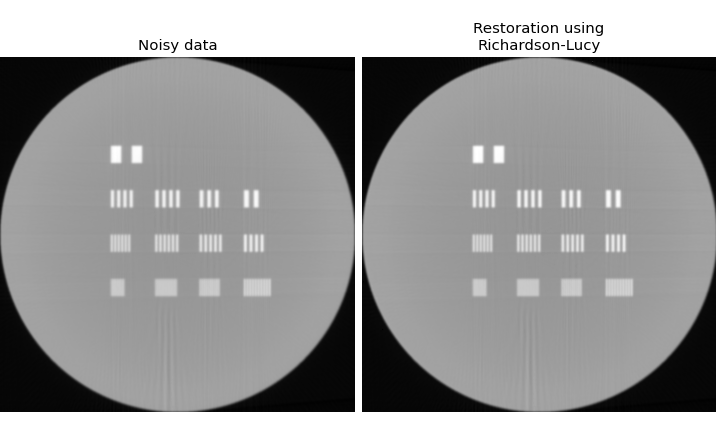

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1]):
       a.axis('off')

ax[0].imshow(astro_noisy)
ax[0].set_title('Noisy data')

ax[1].imshow(deconvolved_RL, vmin=astro_noisy.min(), vmax=astro_noisy.max())
ax[1].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

<IPython.core.display.Javascript object>


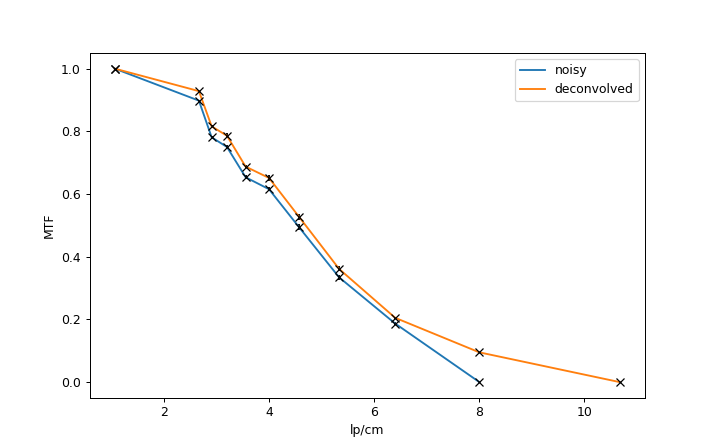

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
plt.gray()

# for a in (ax[0], ax[1]):
#        a.axis('off')

phan.analyse_515(astro_noisy,[ax])
phan.analyse_515(deconvolved_RL,[ax])
ax.legend(['noisy',"deconvolved"])

In [24]:
import tigre

In [64]:
#projs_RL = projs_original.copy()
projs_RL_inten = projs_original.copy()

for ii in range(projs_original.shape[0]):
    #projs_RL[ii] = restoration.richardson_lucy(projs_original[ii], psf, iterations=30,clip=False)
    projs_RL_inten[ii] = -10*np.log(restoration.richardson_lucy(inten_original[:,:,ii], psf, iterations=30,clip=False).T/(flood_summed))

In [62]:
restoration.richardson_lucy(inten_original[:,:,ii], psf, iterations=30,clip=False).shape

(512, 64)

In [65]:
recon_RL_inten = tigre.algorithms.FDK(projs_RL_inten,phan.geomet,np.linspace(0,2*pi,360))

In [52]:
recon_RL = tigre.algorithms.FDK(projs_RL,phan.geomet,np.linspace(0,2*pi,360))

In [69]:
projs_RL_inten,projs_RL

(array([[[1.61913921, 0.97545953, 0.97837547, ..., 0.97282738,
          0.97323706, 1.61791149],
         [0.98209405, 0.16158751, 0.15490662, ..., 0.14943936,
          0.16099098, 0.97931683],
         [0.98501125, 0.15305042, 0.14215197, ..., 0.13956393,
          0.15484779, 0.98462255],
         ...,
         [0.9893567 , 0.15475051, 0.1441258 , ..., 0.14161277,
          0.15639333, 0.98489769],
         [0.98706867, 0.16443439, 0.15804826, ..., 0.15900644,
          0.16717127, 0.98559508],
         [1.62985855, 0.98703506, 0.98891233, ..., 0.99070141,
          0.98885985, 1.63232816]],
 
        [[1.61913921, 0.97545953, 0.97837547, ..., 0.97282738,
          0.97323706, 1.61791149],
         [0.98209405, 0.16158751, 0.15490662, ..., 0.14943936,
          0.16099098, 0.97931683],
         [0.98501125, 0.15305042, 0.14215197, ..., 0.13956393,
          0.15484779, 0.98462255],
         ...,
         [0.9893567 , 0.15475051, 0.1441258 , ..., 0.14161277,
          0.15639333, 0.

<IPython.core.display.Javascript object>


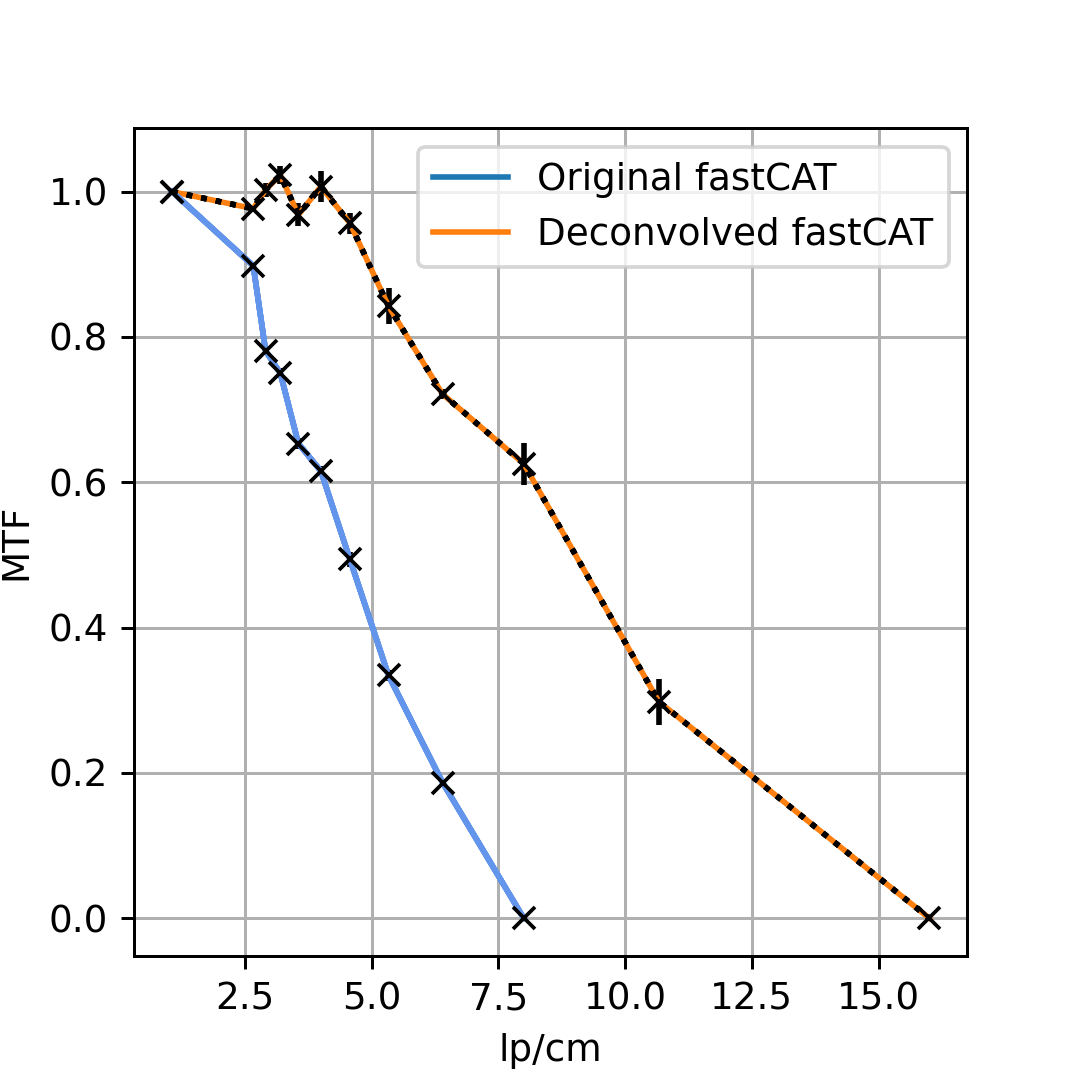

In [147]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4),dpi=300)
plt.gray()

# for a in (ax[0], ax[1]):
#        a.axis('off')

phan.analyse_515(astro_noisy,[ax])

line = ax.lines[0]
# phan.analyse_515(deconvolved_RL,[ax])
# phan.analyse_515(recon_RL[5],[ax])
phan.analyse_515(recon_RL_inten[5],[ax])

line2 = ax.lines[3]

In [150]:
ax.plot(line.get_data()[0],line.get_data()[1],'k-',color='cornflowerblue')
ax.plot(line2.get_data()[0],line2.get_data()[1],'k:')
ax.grid()

ax.legend(['Original fastCAT',"Deconvolved fastCAT"])

In [151]:
plt.savefig('/home/xcite/fastcat_paper/figures/deconvolution_MTF.pdf')

<IPython.core.display.Javascript object>


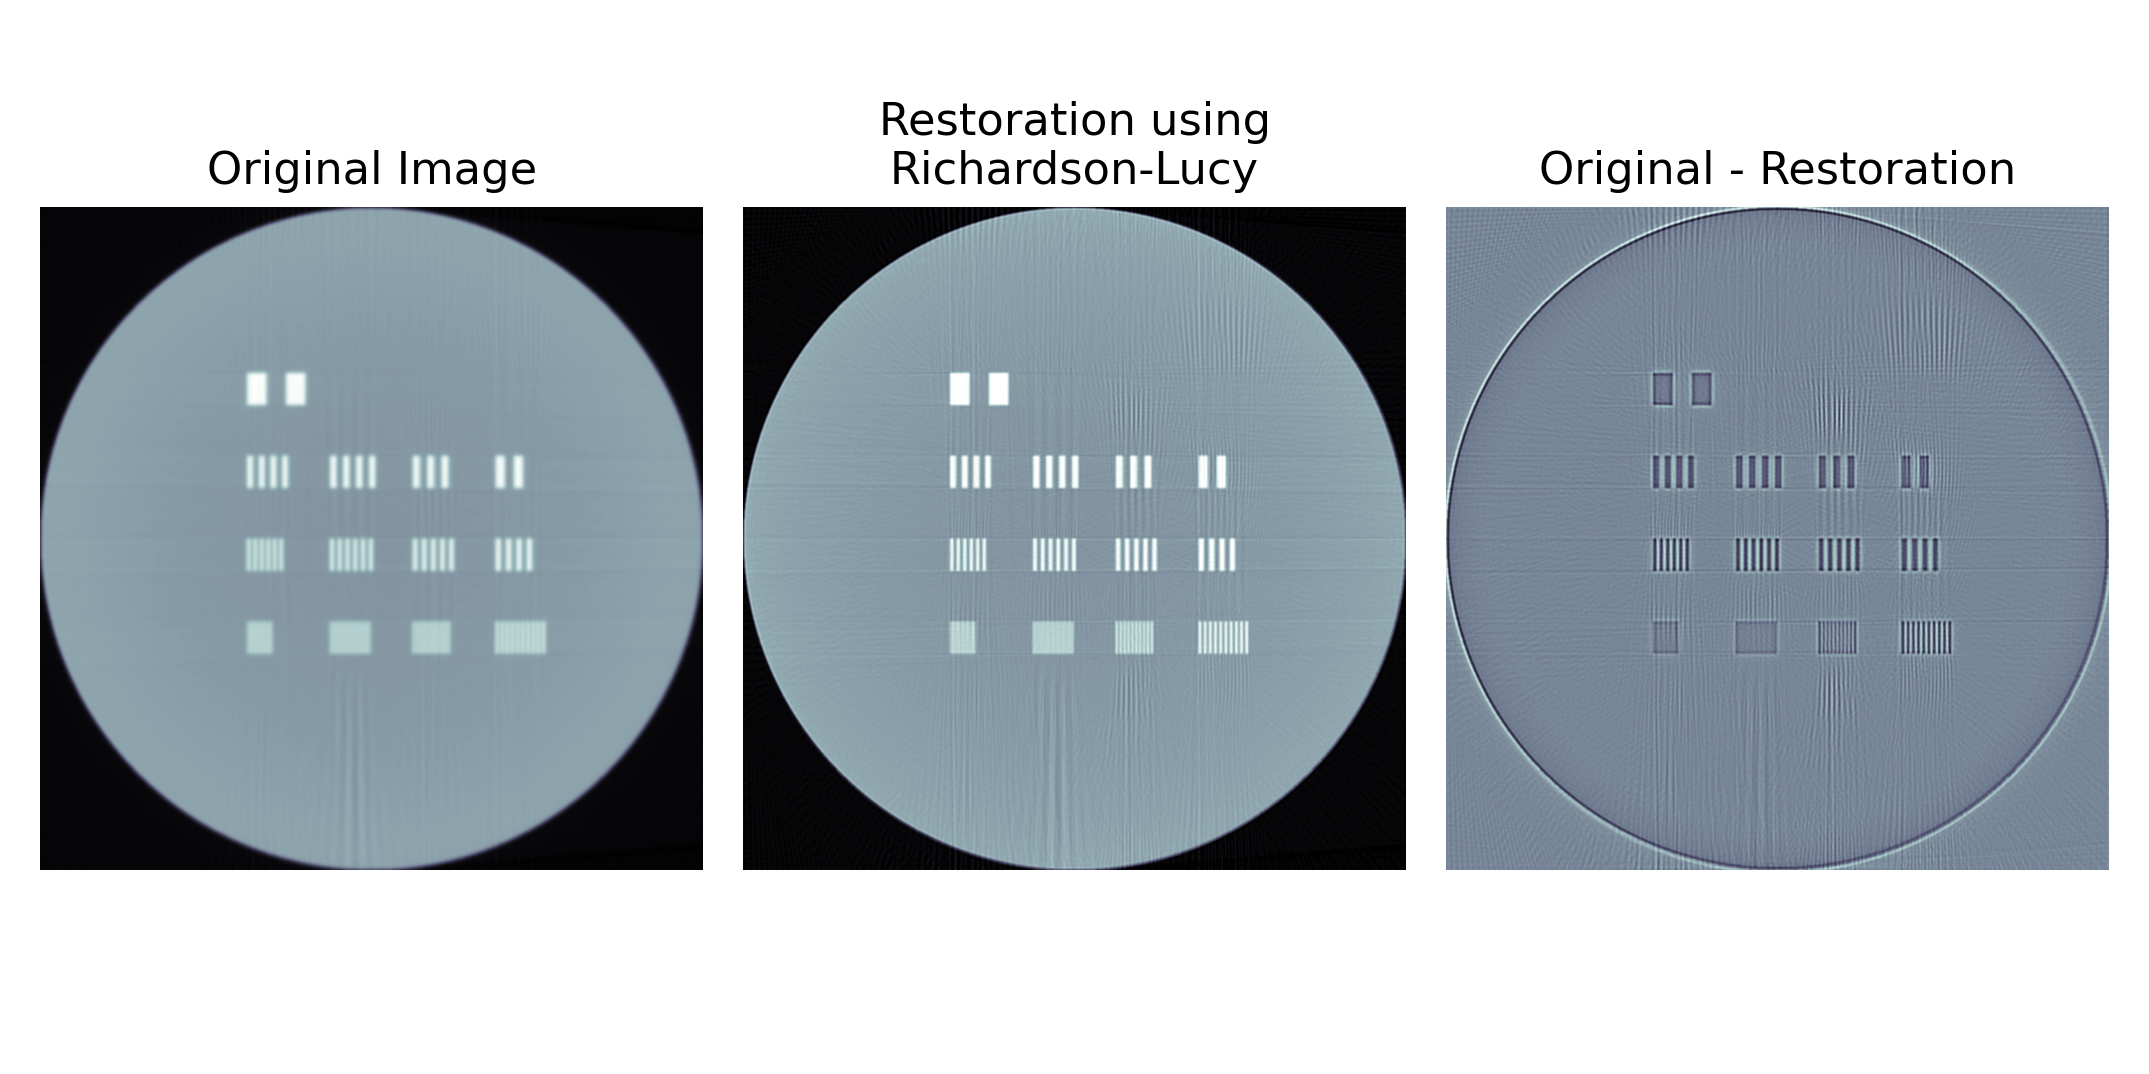

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 4),dpi=300)
plt.gray()

for a in (ax[0], ax[1],ax[2]):
       a.axis('off')

ax[0].imshow(astro_noisy, vmin=astro_noisy.min(), vmax=astro_noisy.max(),cmap='bone')
ax[0].set_title('Original Image')

ax[1].imshow(recon_RL_inten[5], vmin=astro_noisy.min(), vmax=astro_noisy.max(),cmap='bone')
ax[1].set_title('Restoration using\nRichardson-Lucy')

im = ax[2].imshow((astro_noisy-recon_RL_inten[5]),cmap='bone')
ax[2].set_title('Original - Restoration')

# cax = fig.add_axes([0.7, 0.22, 0.25, 0.05])

# fig.colorbar(im,cax=cax,orientation='horizontal')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()
plt.tight_layout()

In [110]:
plt.savefig('/home/xcite/fastcat_paper/figures/deconvolution.pdf')